# La maldición de la dimensionalidad

En el notebook anterior comentamos que *k*-NN es vulnerable a la llamada *maldición de la dimensionalidad*. Este es un fenómeno que se presenta de distintas formas cuando trabajamos con datos con un número de dimensiones muy alto. 

Para ilustrar esto, vamos a evaluar cómo se comporta la distribución de la distancia euclideana entre todos los puntos de un dataset a medida que incluímos más dimensiones.

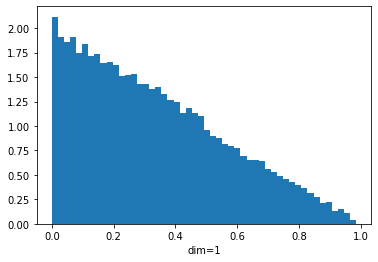

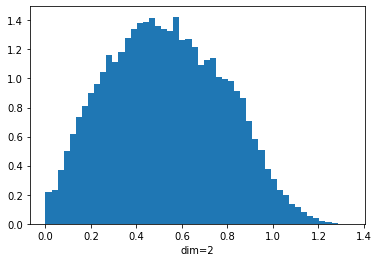

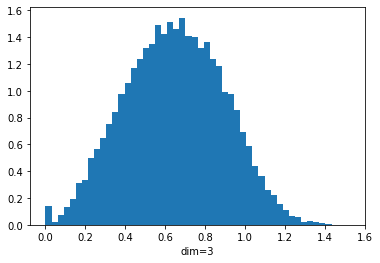

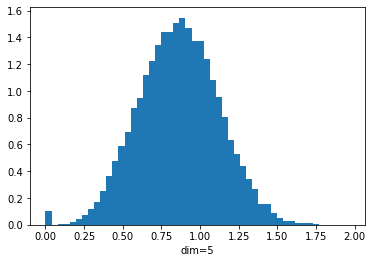

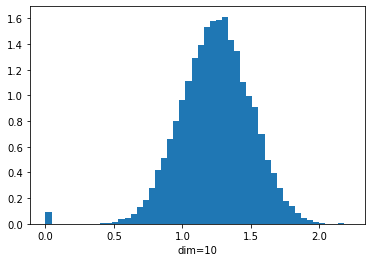

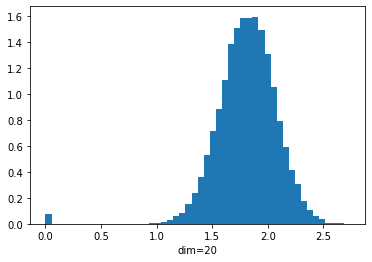

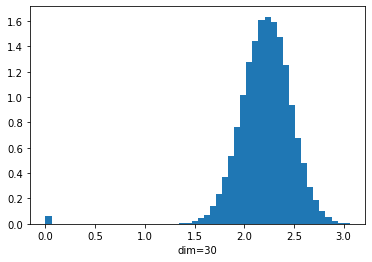

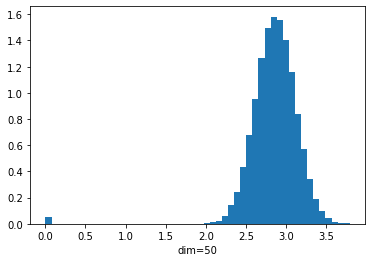

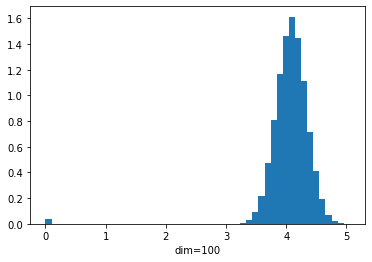

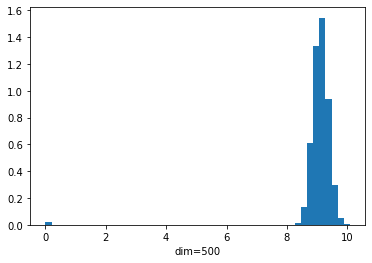

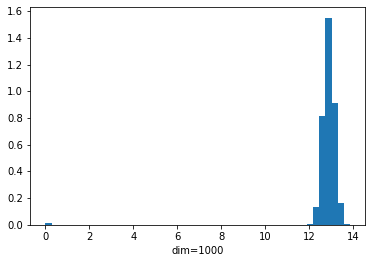

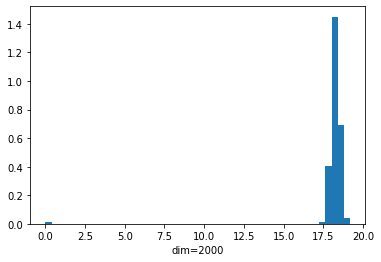

,distancia_promedio
1,0.329336
2,0.530485
3,0.646717
5,0.862599
10,1.241702
20,1.811371
30,2.214880
50,2.858690
100,4.068308
500,9.086055


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import iqr

N = 250
val_dims = [1, 2, 3, 5, 10, 20, 30, 50, 100, 500, 1000, 2000]
d_mean = []


for d in val_dims:
    x1 = np.random.rand(N, d)
    dist = np.sqrt(np.hstack([(np.sum((x - x1)**2,axis=1)) for x in x1]))    
    d_mean.append(dist.mean())

    plt.hist(dist,bins=50, density=True)
    plt.xlabel("dim=" + str(d))
    plt.show()
    
pd.DataFrame(d_mean, val_dims, ['distancia_promedio'])

Como podemos observar, a medida que agregamos más dimensiones, la distancia promedio entre un punto y otro **además de crecer**, **se confina a un rango de valores pequeño**.

¿Cuál es la consecuencia de esto? Que, con una alta dimensionalidad, **todos los vecinos tienden a ser "distantes"** para nuestro clasificador $k$-NN, haciendo cada vez más difícil diferenciar un punto de otro, lo cual **desmejora la calidad del clasificador**.

## ¿Qué podemos hacer? 

Cuando contamos con una alta cantidad de dimensiones, se vuelve más probable que tengamos dimensiones que son 

1. **Redundantes**. Es decir, que no aportan información adicional porque existe al menos otra dimensión que ya lo hace
2. **Irrelevantes**. Es decir, que no la información que aporta no ayuda al problema que estamos tratando de resolver.

Lo que quiere decir que, mediante el uso de técnicas de **reducción de dimensionalidad**, podemos quitar de nuestro dataset de aquellas dimensiones que cumplan con las anteriores condiciones.
